# Jayveersinh Raj
# BS20-DS-01
# j.raj@innopolis.university

# Task 1

In [ ]:
import pandas as pd
smp = pd.read_excel("/content/SP500WeekDays (3).xlsx")
smp

,year,mom,day,sp,M,T,W,R,F
0,1980,1,2,-0.020196,0,0,1,0,0
1,1980,1,3,-0.005106,0,0,0,1,0
2,1980,1,4,0.012355,0,0,0,0,1
3,1980,1,7,0.002722,1,0,0,0,0
4,1980,1,8,0.020036,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
7314,2008,12,24,0.005781,0,0,1,0,0
7315,2008,12,26,0.005356,0,0,0,0,1
7316,2008,12,29,-0.003873,1,0,0,0,0
7317,2008,12,30,0.024407,0,1,0,0,0


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create the regression model
X = smp[['M', 'T', 'W', 'R', 'F']]  # Independent variables (weekday indicators)
X = sm.add_constant(X)  # Add a constant (intercept) to the model
y = smp['sp']  # Dependent variable (S&P 500 index returns)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})  # HAC estimator with 1 lag

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     sp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.796
Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0158
Time:                        16:04:02   Log-Likelihood:                 22514.
No. Observations:                7319   AIC:                        -4.502e+04
Df Residuals:                    7314   BIC:                        -4.498e+04
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.661      0.0

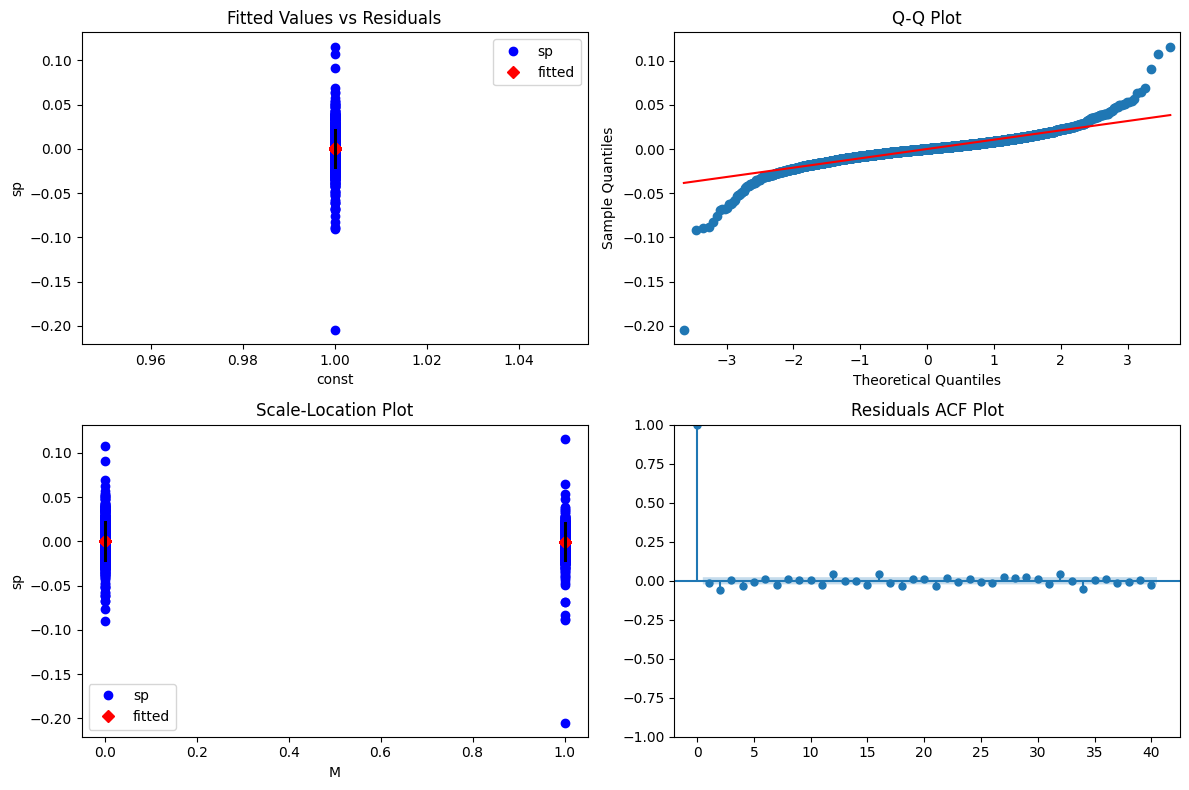

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals vs Fitted Values
sm.graphics.plot_fit(results, 0, ax=axes[0, 0])
axes[0, 0].set_title('Fitted Values vs Residuals')

# Q-Q Plot
sm.qqplot(results.resid, line='r', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Scale-Location (Homoscedasticity) Plot
sm.graphics.plot_fit(results, 1, ax=axes[1, 0])
axes[1, 0].set_title('Scale-Location Plot')

# Residuals Autocorrelation Function (ACF) Plot
plot_acf(results.resid, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('Residuals ACF Plot')

plt.tight_layout()
plt.show()

## Fitted Model (OLS):
The fitted model for the S&P 500 index returns based on the weekday indicators is as follows:

$SP$
=
0.0003
−
0.0003
×
$M$
+
0.0005
×
$T$
+
0.0004
×
$W$
−
0.0002
×
$R$
+
0.00004
×
$F$
SP=0.0003−0.0003×M+0.0005×T+0.0004×W−0.0002×R+0.00004×F
Weekday Effects Significance:

- Monday (M): The effect of Monday on index returns is not statistically significant at the 5% level (p-value = 0.286).
- Tuesday (T): The effect of Tuesday on index returns is not significant at the 5% level (p-value = 0.088).
- Wednesday (W): The effect of Wednesday on index returns is not statistically significant at the 5% level (p-value = 0.153).
- Thursday (R): The effect of Thursday on index returns is not statistically significant at the 5% level (p-value = 0.374).
- Friday (F): The effect of Friday on index returns is not statistically significant at the 5% level (p-value = 0.866).

### Conclusion Regarding Weekday Effects:

Based on the results, **None of the weekdays' p-value is < 0.05, hence, neither are statistically significant**

### HAC Estimator and Conclusion:

1. The HAC estimator of the covariance matrix is used in these results. It adjusts for potential autocorrelation and heteroskedasticity in the data.

2. However, even with the HAC estimator, the conclusion remains the same: **None of the weekdays' p-value is < 0.05, hence, neither are statistically significant**
.







# Task 2

# 1.

In [ ]:
import pandas as pd
mq = pd.read_excel("/content/USMacro_Quarterly.xls")
mq

,Date,RealGDP,TbillRate
0,1947:01,1570.5,0.38000
1,1947:02,1568.7,0.38000
2,1947:03,1568.0,0.73667
3,1947:04,1590.9,0.90667
4,1948:01,1616.1,0.99000
...,...,...,...
227,2003:04,10580.7,0.91667
228,2004:01,10697.5,0.91667
229,2004:02,10784.7,1.07667
230,2004:03,10891.0,1.48667


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Strip leading and trailing spaces from the 'Date' column and convert it to datetime format
mq['Date'] = pd.to_datetime(mq['Date'].str.strip(), format='%Y:%m')

# Set the 'Date' column as the index
mq.set_index('Date', inplace=True)

# Compute the logarithm of real GDP (Yt)
mq['LogRealGDP'] = np.log(mq['RealGDP'])

# Compute the quarterly growth rate of GDP (ΔYt)
mq['GDP_growth'] = mq['LogRealGDP'].diff()

# Specify the sample period (1955:1 - 2004:4)
sample_period = mq['1955-01-01':'2004-12-31']

# i. a) Estimate the mean of ΔYt using OLS regression
X = sm.add_constant(np.arange(len(sample_period)))
model = sm.OLS(sample_period['GDP_growth'], X)
results = model.fit()
mean_growth_rate = results.params[1]

# i. b) Express the mean growth rate in percentage points at an annual rate
mean_growth_rate_annual = mean_growth_rate * 400

# i. c) Estimate the standard deviation of ΔYt
std_dev_growth_rate = sample_period['GDP_growth'].std()

# i. c) Express the standard deviation in percentage points at an annual rate
std_dev_growth_rate_annual = std_dev_growth_rate * np.sqrt(4) * 100  # multiplying by sqrt(4) to annualize

# i. d) Estimate the first four autocorrelations of ΔYt using autocorrelation function (ACF)
autocorrelations = sm.tsa.acf(sample_period['GDP_growth'].dropna(), nlags=4)

# Display the results
print("i. a) Mean of ΔYt:", mean_growth_rate)
print("i. b) Mean growth rate at an annual rate:", mean_growth_rate_annual)
print("i. c) Standard deviation of ΔYt:", std_dev_growth_rate)
print("i. c) Standard deviation at an annual rate:", std_dev_growth_rate_annual)
print("i. d) Autocorrelations of ΔYt:", autocorrelations)

i. a) Mean of ΔYt: -9.740528305690695e-06
i. b) Mean growth rate at an annual rate: -0.003896211322276278
i. c) Standard deviation of ΔYt: 0.009205802487104224
i. c) Standard deviation at an annual rate: 1.8411604974208449
i. d) Autocorrelations of ΔYt: [ 1.          0.28940872  0.17108983  0.02594531 -0.0239606 ]


## Plot

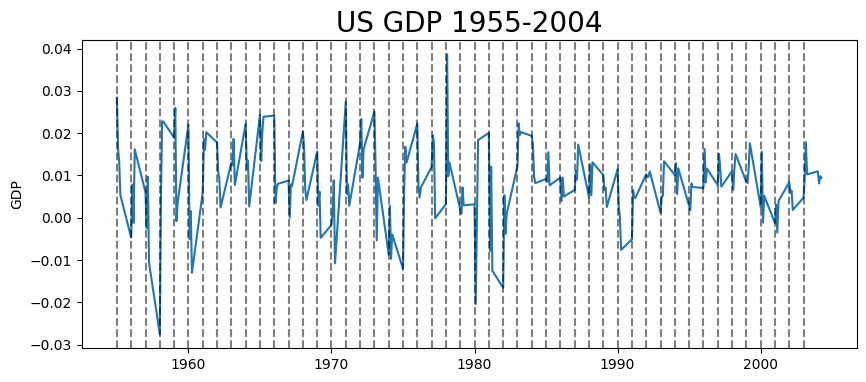

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(sample_period['GDP_growth'])
plt.title("US GDP growth rate 1955-2004", fontsize = 20)
plt.ylabel("GDP")
for year in range(1955,2004):
  plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'k', linestyle = '--', alpha = 0.5)

#2.

## Plot for the acf

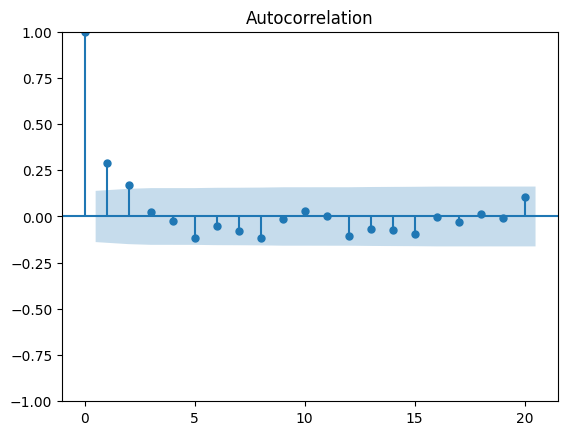

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(sample_period['GDP_growth'], lags = 20, alpha=0.05)

### Conclusions from the plot:
 ### Due to decaying auto correlation over time, we are safe to fit an auto regressive AR model. However, after lag 1 because of being inside the blue region, all are statictially insignificant.

### ii a,b

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

# Load the data from the CSV file
df = pd.read_excel('/content/USMacro_Quarterly.xls')

# Strip leading and trailing spaces from the 'Date' column and convert it to datetime format
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%Y:%m')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Compute the logarithm of real GDP (Yt)
df['LogRealGDP'] = np.log(df['RealGDP'])

# Compute the quarterly growth rate of GDP (ΔYt)
df['GDP_growth'] = df['LogRealGDP'].diff()

# Specify the sample period (1955:1 - 2004:4)
sample_period = df['1955-01-01':'2004-12-31']

# Estimate AR(1) model
ar1_model = AutoReg(sample_period['GDP_growth'], 1).fit()
ar1_coefficient = ar1_model.params[1]
ar1_p_value = ar1_model.pvalues[1]
ar1_conf_int = ar1_model.conf_int(alpha=0.05)

# Display results for AR(1)
print("AR(1) Coefficient:", ar1_coefficient)
print("AR(1) P-value:", ar1_p_value)
print("AR(1) 95% Confidence Interval:", ar1_conf_int)

# Estimate AR(2) model
ar2_model = AutoReg(sample_period['GDP_growth'], 2).fit()
ar2_coefficient = ar2_model.params[2]
ar2_p_value = ar2_model.pvalues[2]

# Display results for AR(2)
print("\nAR(2) Coefficient:", ar2_coefficient)
print("AR(2) P-value:", ar2_p_value)

# Estimate AR(3) model
ar3_model = AutoReg(sample_period['GDP_growth'],3).fit()
ar3_coefficient = ar3_model.params[3]
ar3_p_value = ar3_model.pvalues[3]

# Display results for AR(3)
print("\nAR(3) Coefficient:", ar3_coefficient)
print("AR(3) P-value:", ar3_p_value)

# Estimate AR(4) model
ar4_model = AutoReg(sample_period['GDP_growth'],4).fit()
ar4_coefficient = ar4_model.params[4]
ar4_p_value = ar4_model.pvalues[4]

# Display results for AR(4)
print("\nAR(4) Coefficient:", ar4_coefficient)
print("AR(4) P-value:", ar4_p_value)

# Choose the number of lags using BIC
bic_values = [ar1_model.bic, ar2_model.bic, ar3_model.bic, ar4_model.bic]
best_lag_bic = np.argmin(bic_values) + 1  # Adding 1 because lag starts from 1

# Choose the number of lags using AIC
aic_values = [ar1_model.aic, ar2_model.aic, ar3_model.aic, ar4_model.aic]
best_lag_aic = np.argmin(aic_values) + 1  # Adding 1 because lag starts from 1

# Display the chosen number of lags
print("\nBest Number of Lags (BIC):", best_lag_bic)
print("Best Number of Lags (AIC):", best_lag_aic)

AR(1) Coefficient: 0.2894257075646861
AR(1) P-value: 1.5422069547279888e-05
AR(1) 95% Confidence Interval:                       0         1
const          0.004146  0.007391
GDP_growth.L1  0.158193  0.420659

AR(2) Coefficient: 0.09643494952757903
AR(2) P-value: 0.16747438144171467

AR(3) Coefficient: -0.050503645664086466
AR(3) P-value: 0.47239202324645657

AR(4) Coefficient: -0.0400850858367815
AR(4) P-value: 0.5694834589675215

Best Number of Lags (BIC): 1
Best Number of Lags (AIC): 1


### Fitted model plot AR(1)

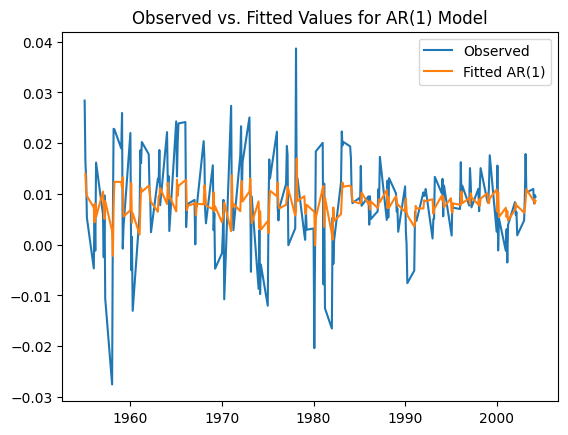

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series and fitted values
plt.plot(sample_period['GDP_growth'], label='Observed')
plt.plot(ar1_model.fittedvalues, label='Fitted AR(1)')
plt.legend()
plt.title('Observed vs. Fitted Values for AR(1) Model')
plt.show()

## Diagnosis

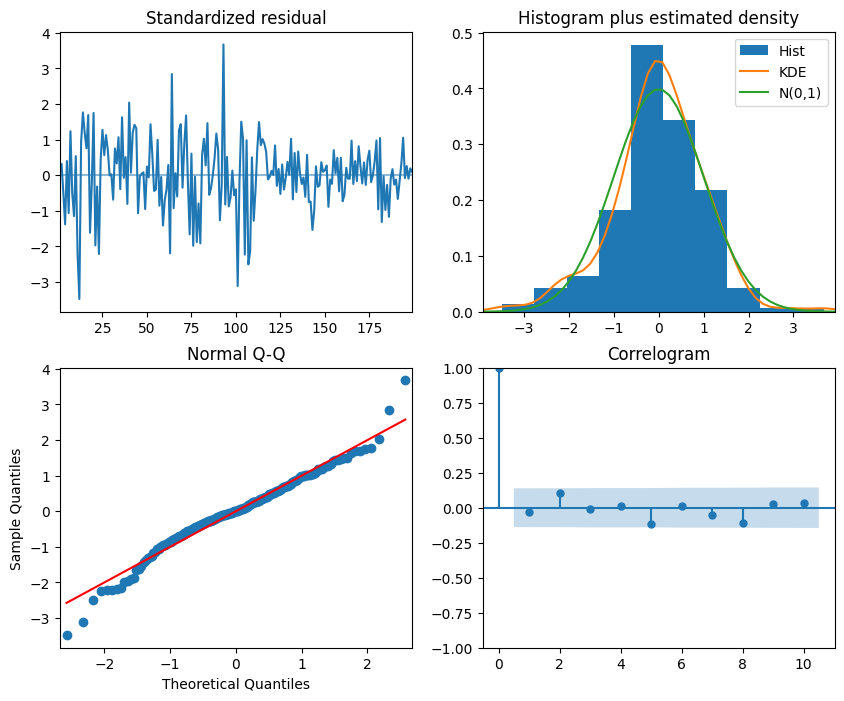

In [ ]:
# Diagnostic plots for AR(1) model
ar1_model.plot_diagnostics(figsize = (10,8))
plt.show()

### 2 ii.

In [ ]:
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

# Estimate AR(1) model with constant and trend
ar1_model_trend = AutoReg(sample_period['GDP_growth'], 1, trend='ct').fit()

# ADF test for AR(1) model with constant and trend
adf_result_ar1_trend = adfuller(ar1_model_trend.resid.dropna())
print("\nADF Test for AR(1) Residuals with Constant and Trend:")
print("ADF Statistic:", adf_result_ar1_trend[0])
print("P-value:", adf_result_ar1_trend[1])
print("Critical Values:", adf_result_ar1_trend[4])


ADF Test for AR(1) Residuals with Constant and Trend:
ADF Statistic: -9.038860878437207
P-value: 5.199067755157266e-15
Critical Values: {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}


## Conclusions

### 1. With a highly negative ADF statistic and an extremely small p-value, we reject the null hypothesis of a unit root.
###  2. Therefore, based on the ADF test, we have evidence that the residuals of the AR(1) model with a constant and trend are stationary around a constant and linear trend.
### This result is indicative that the AR(1) model with a constant and trend captures the time series behavior well, and the residuals exhibit stationarity, which is desirable for reliable modeling and forecasting.

# Task 3
## Given Data:
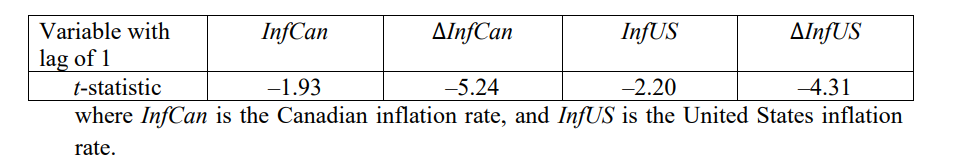

## a.
## Table for critical values:
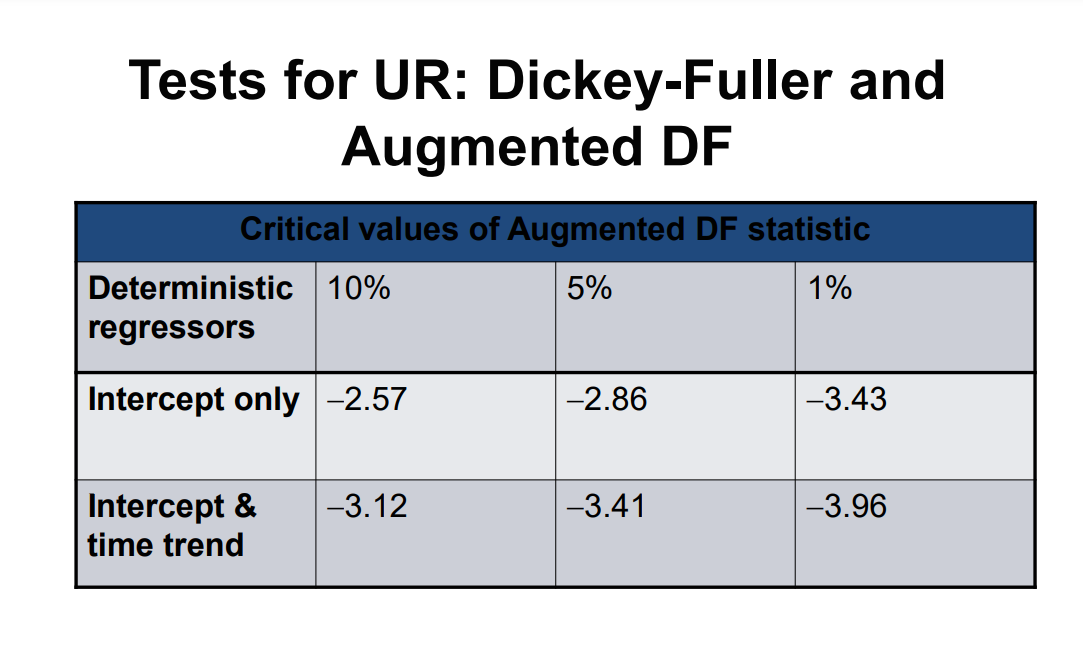

## $H_0$: presence of unit root (non-stationary)
## $H_1$: Stationarity

## From the values provided on t-statistics we have:
 - ## InfCan: -1.93
 - ## ∆InfCan: -5.24
 - ## InfUS: -2.20
 - ## ∆InfUS: -4.31

## 1. InfCan (Canadian Inflation Rate):
## t-statistic: -1.93
## Decision:
- ### For Intercept Only:
 - ### -1.93 > -2.86 (5% critical value)
 - ### Fail to reject the null hypothesis, suggesting non-stationarity.
- ### For Intercept & Time Trend:
 - ### -1.93 > -3.41 (5% critical value)
 - ### Fail to reject the null hypothesis, suggesting non-stationarity.

## And also the same for (incercept only) 10% and 1% critical values since -1.93 > -2.57, -1.93 > -3.43 respectively. Moreover, for Intercept & time trend as well -1.93 is greater than all the critical values of the table.

## 2. ∆InfCan (First Difference of Canadian Inflation Rate):
## t-statistic: -5.24
## Decision:
 - ### For Intercept Only:
  - ### -5.24 < -2.86 (5% critical value)
  - ### Reject the null hypothesis, suggesting stationarity.
 - ### For Intercept & Time Trend:
  - ### -5.24 < -3.41 (5% critical value)
  - ### Reject the null hypothesis, suggesting stationarity.

## And also the same for (incercept only) 10% and 1% critical values since -5.24 < -2.57, -5.24 < -3.43 respectively. Moreover, for Intercept & time trend as well -5.24 is greater than all the critical values of the table.

## 3. InfUS (United States Inflation Rate):
## t-statistic: -2.20
## Decision:
 - ### For Intercept Only:
  - ### -2.20 > -2.86 (5% critical value)
  - ### Fail to reject the null hypothesis, suggesting non-stationarity.
 - ### For Intercept & Time Trend:
  - ### -2.20 > -3.41 (5% critical value)
  - ### Fail to reject the null hypothesis, suggesting non-stationarity.

## And also the same for (incercept only) 10% and 1% critical values since -2.20 > -2.57, -2.20 > -3.43 respectively. Moreover, for Intercept & time trend as well -2.20 is greater than all the critical values of the table.  

## 4. ∆InfUS (First Difference of United States Inflation Rate):
## t-statistic: -4.31
## Decision:
  - ### For Intercept Only:
   - ### -4.31 < -2.86 (5% critical value)
   - ### Reject the null hypothesis, suggesting stationarity.
  - ### For Intercept & Time Trend:
   - ### -4.31 < -3.41 (5% critical value)
   - ### Reject the null hypothesis, suggesting stationarity.

## And also the same for (incercept only) 10% and 1% critical values since -4.31 < -2.57, -4.31 < -3.43 respectively. Moreover, for Intercept & time trend as well -4.31 is greater than all the critical values of the table.   


## Conclusion:
- ### The first differences **(∆InfCan and ∆InfUS)** are found to be **stationary**.
- ### The original series **(InfCan and InfUS)** are found to be **non-stationary**.

# b.

## Critical values table:
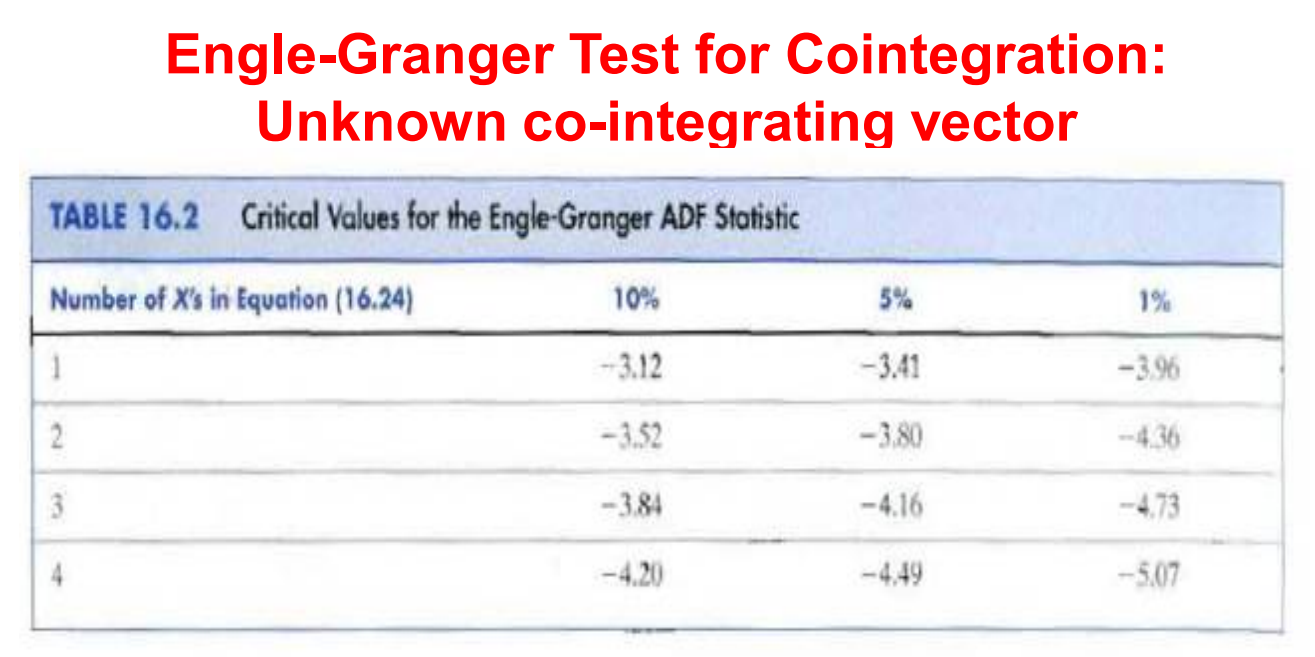

## $H_0$: a unit root in the residuals
## $H_1$: cointegration between the variables in the cointegrating regression.

## Since the EG–ADF statistic is more negative than all the critical values, we can reject the null hypothesis of a unit root in the residuals.

# C.

## Here's how one can test whether the cointegrating coefficient equals one:

## 1. Run the Cointegrating Regression:

## Begin by estimating the cointegrating regression, which is the long-term relationship between the two variables. This typically involves regressing one variable on the other. For example, if you are testing the cointegration between Canadian inflation (InfCan) and U.S. inflation (InfUS), run a regression like:

## $InfCan$ = $\beta_0$ + $\beta_1$ × $InfUS$ + $Error$
## The coefficient $\beta_1$  in this regression is the cointegrating coefficient.

## 2. Test Hypothesis:

## Formulate the null and alternative hypotheses:
## Null Hypothesis ($H_0$): $\beta_1$ = 1 (the cointegrating coefficient equals one).
## Alternative Hypothesis ($H_1$): $\beta_1$ ≠ 1 (the cointegrating coefficient is not equal to one).

## 3. Conduct Hypothesis Test:

## Use standard hypothesis testing procedures to test whether the cointegrating coefficient is significantly different from one. This often involves calculating a t-statistic:
## $t$ = $\frac{\hat{\beta_1} - 1}{Standard\ Error\ of\ \hat{\beta_1}}$
 - ## Compare the calculated t-statistic to critical values or use p-values to make a decision.

## 4. Interpret Results:

- ## If the null hypothesis is rejected, it suggests that the cointegrating coefficient is significantly different from one, indicating that the long-term relationship between the variables is not a simple proportionality.
- ## If the null hypothesis is not rejected, it suggests that there is no evidence to suggest that the cointegrating coefficient is different from one.

## 5. Consider Economic Implications:

- ## Additionally, it's important to consider the economic implications of the results. A cointegrating coefficient equal to one would imply a one-to-one relationship in the long run, but this might not always be economically meaningful.
- ## It is also important to use appropriate critical values or p-values based on the chosen significance level, and take into account potential issues such as serial correlation, heteroscedasticity, or other model assumptions.

# d.

## No, even if one cannot reject the null hypothesis of a unit cointegrating coefficient (i.e., the cointegrating coefficient equals one), it may not be sufficient evidence to establish convergence between the two variables. The cointegrating coefficient being equal to one implies a specific long-term relationship between the variables, but convergence involves more than just the existence of cointegration.

## Cointegration implies that there is a long-term relationship between the variables, but it doesn't necessarily indicate the direction or nature of convergence. Here are a few reasons why:

## 1. Direction of Convergence:

## Cointegration alone does not provide information about the direction of convergence. Even if there is a cointegrating relationship, it doesn't necessarily mean that one variable is converging to the other.

## 2. Speed of Convergence:

## Cointegration does not provide information about the speed at which convergence is occurring. Convergence could be slow or rapid, and cointegration alone does not capture the dynamics of this process.

## 3. Structural Breaks:

## The presence of structural breaks in the relationship between the variables could affect the interpretation of cointegration results. A stable cointegrating relationship over one period might not hold in another.

## 4. Additional Factors:

## Other factors, such as changes in economic policies, external shocks, or other structural changes, could impact the convergence process. Cointegration results need to be interpreted in the context of the specific economic factors at play.


## In summary, while cointegration is an important concept and suggests a long-term relationship between variables, it alone may not provide sufficient evidence to establish convergence. Additional analysis, consideration of the economic context, and potentially using more advanced time series techniques may be needed to comprehensively assess convergence between the inflation rates of Canada and the United States.

# Task 4

## i

Percentage of spurious relationships: 0.00%


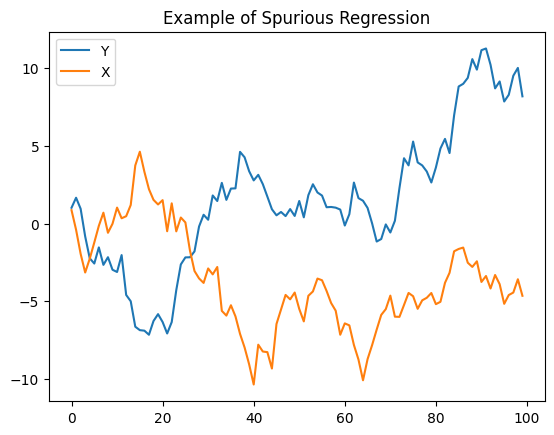

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Number of samples
T = 100

# Number of Monte Carlo simulations
num_simulations = 1000

# Initialize arrays to store results
spurious_relationships = 0

for _ in range(num_simulations):
    # Generate random variables
    epsilon = np.random.randn(T)
    eta = np.random.randn(T)

    # Initialize Y and X
    Y = epsilon.copy()
    X = eta.copy()

    # Generate Y and X using the given process
    for t in range(1, T):
        Y[t] = Y[t - 1] + epsilon[t]
        X[t] = X[t - 1] + eta[t]

    # Perform regression of Y on X
    coef = np.polyfit(X, Y, 1)

    # Check if the coefficient for X is statistically significant
    p_value = np.polyfit(X, Y, 1, full=True)[1][0]
    if p_value < 0.05:
        spurious_relationships += 1

# Calculate the percentage of spurious relationships
percentage_spurious = (spurious_relationships / num_simulations) * 100

# Display the results
print(f"Percentage of spurious relationships: {percentage_spurious:.2f}%")

# Plot one instance to visualize the process
plt.plot(Y, label='Y')
plt.plot(X, label='X')
plt.legend()
plt.title('Example of Spurious Regression')
plt.show()

## ii

## a(i)

In [6]:
import numpy as np
import statsmodels.api as sm

# Simulate one instance of the process
epsilon = np.random.randn(T)
eta = np.random.randn(T)

Y = epsilon.copy()
X = eta.copy()

for t in range(1, T):
    Y[t] = Y[t - 1] + epsilon[t]
    X[t] = X[t - 1] + eta[t]

# Perform OLS regression
X_with_constant = sm.add_constant(X)
model = sm.OLS(Y, X_with_constant)
results = model.fit()

# Get regression results
beta1_hat = results.params[1]
r_squared = results.rsquared
t_statistic = results.tvalues[1]

# Print results
print(f"OLS Estimator (beta1): {beta1_hat:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"T-statistic: {t_statistic:.4f}")

# Hypothesis test at 5% significance level
critical_value = 1.96
reject_null = abs(t_statistic) > critical_value
print(f"Reject null hypothesis: {reject_null}")

OLS Estimator (beta1): -0.7516
R-squared: 0.3446
T-statistic: -7.1777
Reject null hypothesis: True


## Conclusion
## From the experiments above the following are the conclusions:
- ### $R^2 = 0.11$
- ### t-statistic = $|-7.17|= 7.17$ i.e. > 1.96 hence; **Reject the null hypothesis**

## b

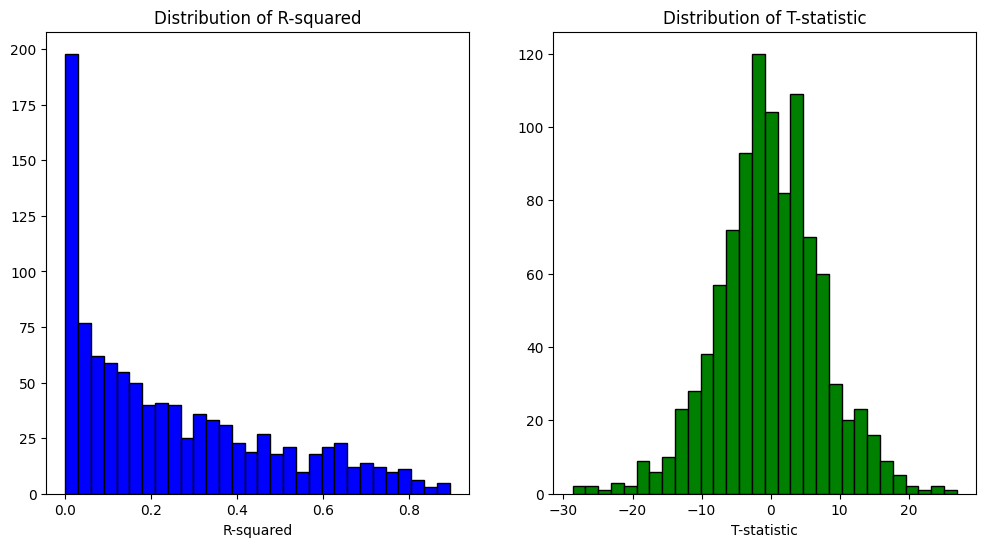

R-squared percentiles: [0.00247792 0.17773809 0.71320605]
T-statistic percentiles: [-12.5912073   -0.29136642  12.63589802]
Fraction of times t-statistic exceeds 1.96: 0.7770


In [7]:
# Initialize arrays to store results
r_squared_values = []
t_statistic_values = []

for _ in range(num_simulations):
    # ... (same simulation process as in part (a))
    epsilon = np.random.randn(T)
    eta = np.random.randn(T)

    Y = epsilon.copy()
    X = eta.copy()

    for t in range(1, T):
        Y[t] = Y[t - 1] + epsilon[t]
        X[t] = X[t - 1] + eta[t]

    # Perform OLS regression
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(Y, X_with_constant)
    results = model.fit()

    # Append results to arrays
    r_squared_values.append(results.rsquared)
    t_statistic_values.append(results.tvalues[1])

# Construct histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r_squared_values, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of R-squared')
plt.xlabel('R-squared')

plt.subplot(1, 2, 2)
plt.hist(t_statistic_values, bins=30, color='green', edgecolor='black')
plt.title('Distribution of T-statistic')
plt.xlabel('T-statistic')

plt.show()

# Calculate percentiles
r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
t_statistic_percentiles = np.percentile(t_statistic_values, [5, 50, 95])

print(f"R-squared percentiles: {r_squared_percentiles}")
print(f"T-statistic percentiles: {t_statistic_percentiles}")

# Calculate the fraction of times the t-statistic exceeds 1.96
fraction_reject = np.mean(np.abs(t_statistic_values) > critical_value)
print(f"Fraction of times t-statistic exceeds 1.96: {fraction_reject:.4f}")

## Conclusion
- ### For 78% of the times, t-statistic exceeds 1.96
- ### 5%, 50% and 95% percentiles of R-squared are 0.002, 0.178 and 0.713 respectively
- ### 5%, 50% and 95% percentiles of t-statistic are -12.591, -0.291 and 12.635 respectively

## C

### T = 50

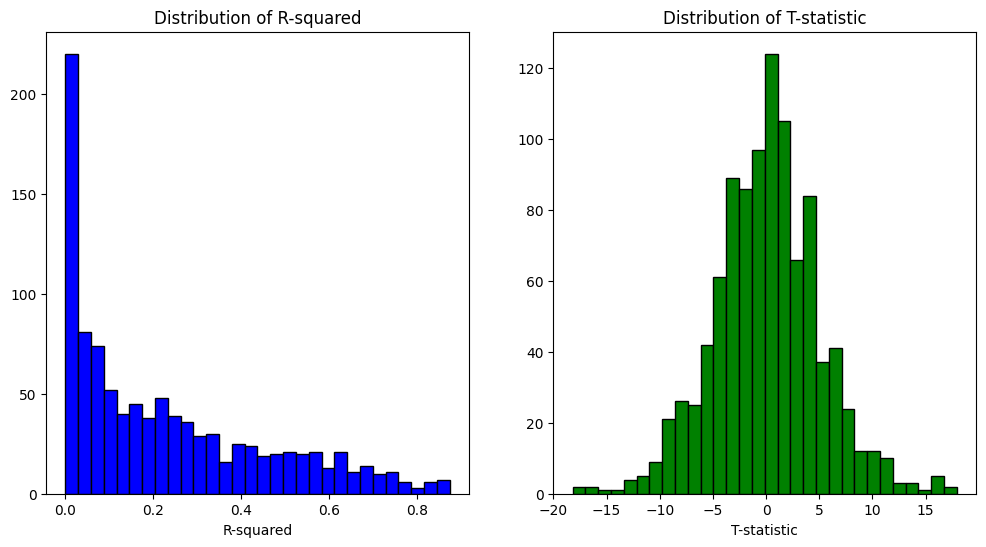

R-squared percentiles: [0.00134091 0.16914343 0.68611404]
T-statistic percentiles: [-8.326646    0.10040935  8.02734249]
Fraction of times t-statistic exceeds 1.96: 0.6580


In [13]:
# List of different sample sizes
sample_sizes = [50]

for T in sample_sizes:
    # ... (repeat the simulation and analysis code)
    # Initialize arrays to store results
  r_squared_values = []
  t_statistic_values = []

  for _ in range(num_simulations):
      # ... (same simulation process as in part (a))
      epsilon = np.random.randn(T)
      eta = np.random.randn(T)

      Y = epsilon.copy()
      X = eta.copy()

      for t in range(1, T):
        Y[t] = Y[t - 1] + epsilon[t]
        X[t] = X[t - 1] + eta[t]

      # Perform OLS regression
      X_with_constant = sm.add_constant(X)
      model = sm.OLS(Y, X_with_constant)
      results = model.fit()

      # Append results to arrays
      r_squared_values.append(results.rsquared)
      t_statistic_values.append(results.tvalues[1])

  # Construct histograms
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(r_squared_values, bins=30, color='blue', edgecolor='black')
  plt.title('Distribution of R-squared')
  plt.xlabel('R-squared')

  plt.subplot(1, 2, 2)
  plt.hist(t_statistic_values, bins=30, color='green', edgecolor='black')
  plt.title('Distribution of T-statistic')
  plt.xlabel('T-statistic')

  plt.show()

  # Calculate percentiles
  r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
  t_statistic_percentiles = np.percentile(t_statistic_values, [5, 50, 95])

  print(f"R-squared percentiles: {r_squared_percentiles}")
  print(f"T-statistic percentiles: {t_statistic_percentiles}")

  # Calculate the fraction of times the t-statistic exceeds 1.96
  fraction_reject = np.mean(np.abs(t_statistic_values) > critical_value)
  print(f"Fraction of times t-statistic exceeds 1.96: {fraction_reject:.4f}")

### T = 200

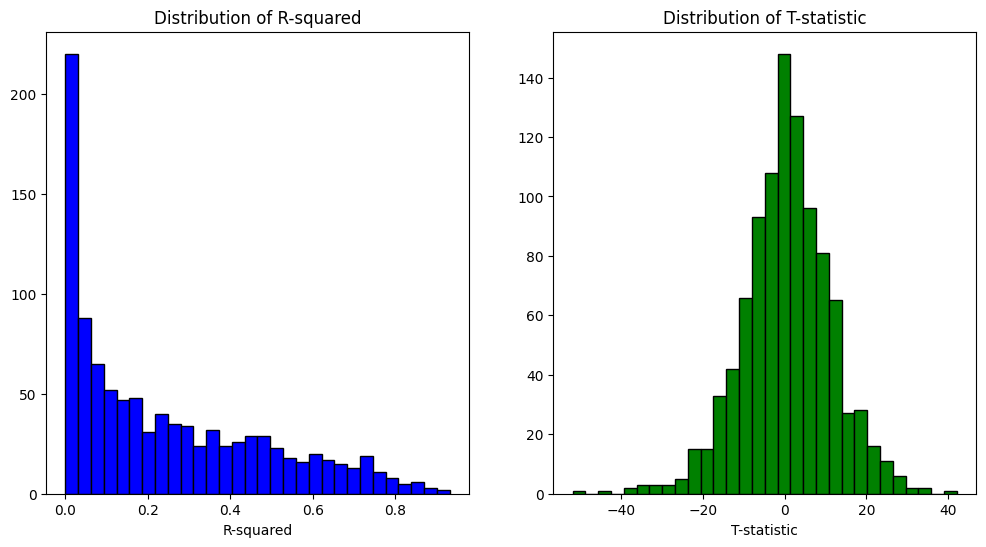

R-squared percentiles: [6.76654084e-04 1.74766249e-01 7.23333144e-01]
T-statistic percentiles: [-17.2635599    0.59620865  18.14359414]
Fraction of times t-statistic exceeds 1.96: 0.8180


In [14]:
# List of different sample sizes
sample_sizes = [200]

for T in sample_sizes:
    # ... (repeat the simulation and analysis code)
    # Initialize arrays to store results
  r_squared_values = []
  t_statistic_values = []

  for _ in range(num_simulations):
      # ... (same simulation process as in part (a))
      epsilon = np.random.randn(T)
      eta = np.random.randn(T)

      Y = epsilon.copy()
      X = eta.copy()

      for t in range(1, T):
        Y[t] = Y[t - 1] + epsilon[t]
        X[t] = X[t - 1] + eta[t]

      # Perform OLS regression
      X_with_constant = sm.add_constant(X)
      model = sm.OLS(Y, X_with_constant)
      results = model.fit()

      # Append results to arrays
      r_squared_values.append(results.rsquared)
      t_statistic_values.append(results.tvalues[1])

  # Construct histograms
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(r_squared_values, bins=30, color='blue', edgecolor='black')
  plt.title('Distribution of R-squared')
  plt.xlabel('R-squared')

  plt.subplot(1, 2, 2)
  plt.hist(t_statistic_values, bins=30, color='green', edgecolor='black')
  plt.title('Distribution of T-statistic')
  plt.xlabel('T-statistic')

  plt.show()

  # Calculate percentiles
  r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
  t_statistic_percentiles = np.percentile(t_statistic_values, [5, 50, 95])

  print(f"R-squared percentiles: {r_squared_percentiles}")
  print(f"T-statistic percentiles: {t_statistic_percentiles}")

  # Calculate the fraction of times the t-statistic exceeds 1.96
  fraction_reject = np.mean(np.abs(t_statistic_values) > critical_value)
  print(f"Fraction of times t-statistic exceeds 1.96: {fraction_reject:.4f}")

### T = 500

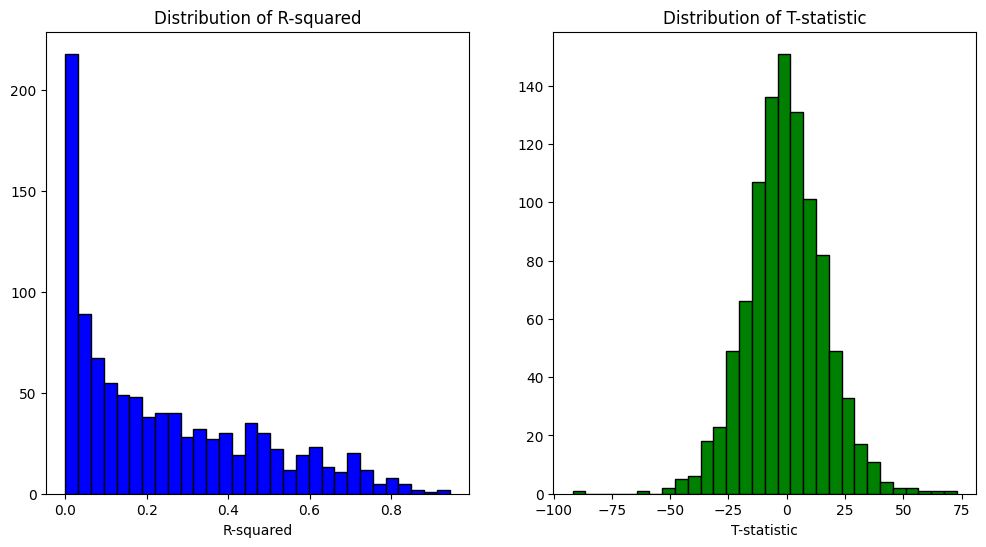

R-squared percentiles: [0.00136763 0.17111029 0.69889374]
T-statistic percentiles: [-27.23758913  -0.83631103  27.45272841]
Fraction of times t-statistic exceeds 1.96: 0.8940


In [16]:
# List of different sample sizes
sample_sizes = [500]

for T in sample_sizes:
    # ... (repeat the simulation and analysis code)
    # Initialize arrays to store results
  r_squared_values = []
  t_statistic_values = []

  for _ in range(num_simulations):
      # ... (same simulation process as in part (a))
      epsilon = np.random.randn(T)
      eta = np.random.randn(T)

      Y = epsilon.copy()
      X = eta.copy()

      for t in range(1, T):
        Y[t] = Y[t - 1] + epsilon[t]
        X[t] = X[t - 1] + eta[t]

      # Perform OLS regression
      X_with_constant = sm.add_constant(X)
      model = sm.OLS(Y, X_with_constant)
      results = model.fit()

      # Append results to arrays
      r_squared_values.append(results.rsquared)
      t_statistic_values.append(results.tvalues[1])

  # Construct histograms
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(r_squared_values, bins=30, color='blue', edgecolor='black')
  plt.title('Distribution of R-squared')
  plt.xlabel('R-squared')

  plt.subplot(1, 2, 2)
  plt.hist(t_statistic_values, bins=30, color='green', edgecolor='black')
  plt.title('Distribution of T-statistic')
  plt.xlabel('T-statistic')

  plt.show()

  # Calculate percentiles
  r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
  t_statistic_percentiles = np.percentile(t_statistic_values, [5, 50, 95])

  print(f"R-squared percentiles: {r_squared_percentiles}")
  print(f"T-statistic percentiles: {t_statistic_percentiles}")

  # Calculate the fraction of times the t-statistic exceeds 1.96
  fraction_reject = np.mean(np.abs(t_statistic_values) > critical_value)
  print(f"Fraction of times t-statistic exceeds 1.96: {fraction_reject:.4f}")

# Conclusion
- ### For T = 50 66% of the time null hypothesis is rejected
- ### For T = 200 82% of the time null hypothesis is rejected
- ### For T = 500 89% of the time null hypothesis is rejected

## Therefore based on the above observations, rejection of hypothesis does not approach 5% in fact it appears to be approaching 100%. Which is tested and justified below for $T = 10000$

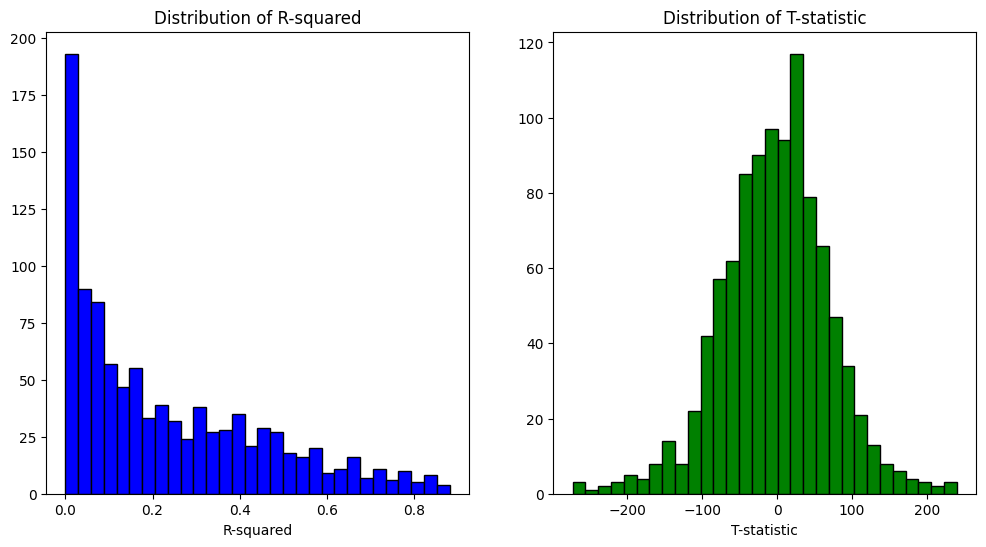

R-squared percentiles: [0.00205729 0.16279334 0.67607575]
T-statistic percentiles: [-1.16862018e+02 -6.38729257e-02  1.11027377e+02]
Fraction of times t-statistic exceeds 1.96: 0.9770


In [17]:
# List of different sample sizes
sample_sizes = [10000]

for T in sample_sizes:
    # ... (repeat the simulation and analysis code)
    # Initialize arrays to store results
  r_squared_values = []
  t_statistic_values = []

  for _ in range(num_simulations):
      # ... (same simulation process as in part (a))
      epsilon = np.random.randn(T)
      eta = np.random.randn(T)

      Y = epsilon.copy()
      X = eta.copy()

      for t in range(1, T):
        Y[t] = Y[t - 1] + epsilon[t]
        X[t] = X[t - 1] + eta[t]

      # Perform OLS regression
      X_with_constant = sm.add_constant(X)
      model = sm.OLS(Y, X_with_constant)
      results = model.fit()

      # Append results to arrays
      r_squared_values.append(results.rsquared)
      t_statistic_values.append(results.tvalues[1])

  # Construct histograms
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(r_squared_values, bins=30, color='blue', edgecolor='black')
  plt.title('Distribution of R-squared')
  plt.xlabel('R-squared')

  plt.subplot(1, 2, 2)
  plt.hist(t_statistic_values, bins=30, color='green', edgecolor='black')
  plt.title('Distribution of T-statistic')
  plt.xlabel('T-statistic')

  plt.show()

  # Calculate percentiles
  r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
  t_statistic_percentiles = np.percentile(t_statistic_values, [5, 50, 95])

  print(f"R-squared percentiles: {r_squared_percentiles}")
  print(f"T-statistic percentiles: {t_statistic_percentiles}")

  # Calculate the fraction of times the t-statistic exceeds 1.96
  fraction_reject = np.mean(np.abs(t_statistic_values) > critical_value)
  print(f"Fraction of times t-statistic exceeds 1.96: {fraction_reject:.4f}")

## The above results justify that indeed due to the t-statistic exceeding 1.96 98% of the times for T=10000, null hypothesis rejection fraction approaches 1 or 100% as T gets larger